## Fetch DATA

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

Path to dataset files: /home/andeelou/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [7]:

# Define directory where the images are stored
dataset_dir = r'/home/andeelou/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8'

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='training'  # Use 80% for training
)

val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 20% for validation
)

# Check a sample of loaded images
for images, labels in train_data:
    print(images.shape)  # Should print (batch_size, 224, 224, 3)
    break


Found 3061 images belonging to 3 classes.
Found 764 images belonging to 3 classes.


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [10]:


# 1. Cargar y preprocesar datos (desde el directorio local)
dataset_dir = r'/home/andeelou/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train'

# Crear un ImageDataGenerator para la normalización de imágenes
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


# Data augmentation para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Para separar entrenamiento y validación
)

# Solo normalización para validación
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Cargar datos de entrenamiento (con data augmentation)
train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),  # Puedes subirlo a 64x64 o más para mejores resultados
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Cargar datos de validación (sin data augmentation)
val_data = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 2. Mostrar imágenes aleatorias con sus etiquetas
def show_random_images(data, num_images=5):
    # Mostrar imágenes aleatorias con sus etiquetas
    for i in range(num_images):
        img, label = next(data)  # Obtener un batch de imágenes y etiquetas
        plt.figure(figsize=(3, 3))
        plt.imshow(img[0])  # Mostrar la primera imagen del batch
        plt.title(f"Etiqueta: {list(data.class_indices.keys())[np.argmax(label[0])]}")  # Mostrar la etiqueta correspondiente
        plt.axis('off')
        plt.show()

# Mostrar 5 imágenes aleatorias de entrenamiento con sus etiquetas
show_random_images(train_data, 5)

# 3. Construir el modelo CNN (igual al código original)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])


# 4. Compilar el modelo
model.compile(optimizer='adamw',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen de la arquitectura
model.summary()

earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(train_data,
                    epochs=75,
                    validation_data=val_data,
                    callbacks=[earlystop, reduce_lr])

# 6. Evaluar el modelo
test_loss, test_acc = model.evaluate(val_data, verbose=2)
print(f"\nPrecisión en validación: {test_acc:.2%}")

# 7. Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 8. Hacer predicciones sobre un conjunto de validación
predictions = model.predict(val_data)
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(val_data[i][0][0])  # Mostrar una de las imágenes de validación
    plt.title(f"Pred: {list(val_data.class_indices.keys())[np.argmax(predictions[i])]}")  # Mostrar la clase predicha
    plt.axis('off')
plt.show()


Found 2510 images belonging to 36 classes.
Found 605 images belonging to 36 classes.


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

## TRY PRETRAINED MODELS

NETB0

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

In [16]:


# 1. Cargar y preprocesar datos
dataset_dir = r'C:/Users/Andre/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important to keep order for predictions
)

# 2. Mostrar imágenes aleatorias con sus etiquetas
def show_random_images(data, num_images=5):
    for i in range(num_images):
        img, label = next(data)
        plt.figure(figsize=(3, 3))
        plt.imshow(img[0])
        plt.title(f"Etiqueta: {list(data.class_indices.keys())[np.argmax(label[0])]}")
        plt.axis('off')
        plt.show()

# Mostrar 5 imágenes aleatorias de entrenamiento
show_random_images(train_data, 5)

# 3. Construir el modelo EfficientNetB0
base_model = EfficientNetB0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])

# 4. Compilar el modelo
model.compile(
    optimizer=AdamW(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar resumen
model.summary()

# 5. Entrenar el modelo
earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    train_data,
    epochs=75,
    validation_data=val_data,
    callbacks=[earlystop, reduce_lr]
)

# 6. Evaluar el modelo
test_loss, test_acc = model.evaluate(val_data, verbose=2)
print(f"\nPrecisión en validación: {test_acc:.2%}")

# 7. Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante entrenamiento')
plt.legend()

plt.show()

# 8. Hacer predicciones sobre un conjunto de validación
predictions = model.predict(val_data, verbose=1)

# Mostrar imágenes + predicciones
class_labels = list(val_data.class_indices.keys())

# Tomar imágenes y etiquetas verdaderas del conjunto de validación
val_images, val_labels = next(iter(val_data))

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(val_images[i])
    true_label = class_labels[np.argmax(val_labels[i])]
    pred_label = class_labels[np.argmax(predictions[i])]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Andre/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train'

Found 2510 images belonging to 36 classes.
Found 605 images belonging to 36 classes.


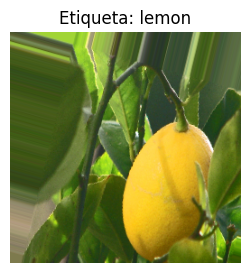

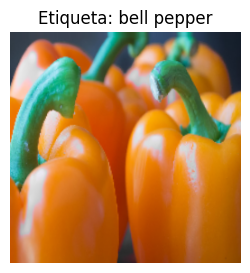

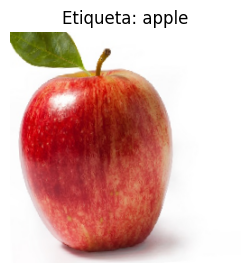

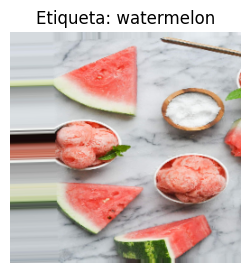

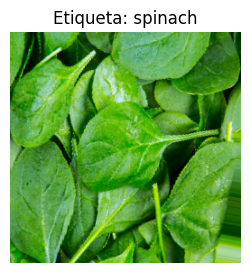

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │    16,777,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,876,516 (64.38 MB)

 Trainable params: 16,875,812 (64.38 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.0452 - loss: 9.0778 - val_accuracy: 0.0479 - val_loss: 7.7966 - learning_rate: 0.0010
Epoch 2/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.0536 - loss: 7.3730 - val_accuracy: 0.0215 - val_loss: 6.6136 - learning_rate: 0.0010
Epoch 3/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.0835 - loss: 6.2831 - val_accuracy: 0.0331 - val_loss: 6.3314 - learning_rate: 0.0010
Epoch 4/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.1163 - loss: 5.2385 - val_accuracy: 0.0678 - val_loss: 5.5431 - learning_rate: 0.0010
Epoch 5/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.1394 - loss: 4.7316 - val_accuracy: 0.1388 - val_loss: 4.7619 - learning_rate: 0.0010
Epoch 6/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.1267 - loss: 4.4891 - val_accuracy: 0.1983 - val_loss: 4.2501 - learning_rate: 0.0010
Epoch 7/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.1611 - loss: 4.5931 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and preprocess data
dataset_dir = r'C:/Users/Andre/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# 2. Show random images
def show_random_images(data, num_images=5):
    for i in range(num_images):
        img, label = next(data)
        plt.figure(figsize=(3, 3))
        plt.imshow(img[0])
        plt.title(f"Etiqueta: {list(data.class_indices.keys())[np.argmax(label[0])]}")
        plt.axis('off')
        plt.show()

show_random_images(train_data, 5)

# 3. Build the custom CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(train_data.num_classes, activation='relu')
])

# 4. Compile the model
model.compile(
    optimizer=AdamW(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 5. Train the model
earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    train_data,
    epochs=75,
    validation_data=val_data,
    callbacks=[earlystop, reduce_lr]
)

# 6. Evaluate the model
test_loss, test_acc = model.evaluate(val_data, verbose=2)
print(f"\nPrecisión en validación: {test_acc:.2%}")

# 7. Plot training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

# 8. Predict and show examples
predictions = model.predict(val_data)
plt.figure(figsize=(15, 5))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img, label = val_data[i]
    plt.imshow(img[0])
    pred_label = list(val_data.class_indices.keys())[np.argmax(predictions[i])]
    plt.title(f"Pred: {pred_label}")
    plt.axis('off')

plt.show()


# DEFINITIVE MODEL 1.0

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import PIL.Image

In [25]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [26]:


# 1. Cargar y preprocesar datos
dataset_dir = r'/home/andeelou/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train'

# Data augmentation + normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 2. Mostrar imágenes aleatorias con sus etiquetas
def show_random_images(data, num_images=5):
    for i in range(num_images):
        img, label = next(data)
        plt.figure(figsize=(3, 3))
        plt.imshow(img[0])
        plt.title(f"Etiqueta: {list(data.class_indices.keys())[np.argmax(label[0])]}")
        plt.axis('off')
        plt.show()

show_random_images(train_data, 5)

# 3. Construir el modelo CNN mejorado
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])


from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(train_data.num_classes, activation='softmax')(x)
model = tf.keras.Model(base_model.input, output)

# 4. Compilar el modelo con una política de tasa de aprendizaje
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 5. Entrenar el modelo con callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(train_data,
                    epochs=10,
                    validation_data=val_data,
                    callbacks=callbacks)

# 6. Evaluar el modelo
test_loss, test_acc = model.evaluate(val_data, verbose=2)
print(f"\nPrecisión en validación: {test_acc:.2%}")

# 7. Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 8. Hacer predicciones sobre un conjunto de validación
val_data.reset()
val_images, val_labels = next(val_data)
predictions = model.predict(val_images)

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(val_images[i])
    pred_label = list(val_data.class_indices.keys())[np.argmax(predictions[i])]
    true_label = list(val_data.class_indices.keys())[np.argmax(val_labels[i])]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.show()

# 9. Matriz de confusión y clasificación
val_data.reset()
y_pred = model.predict(val_data, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Matriz de Confusión")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

Found 2510 images belonging to 36 classes.
Found 605 images belonging to 36 classes.


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.